# ARIMA

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import util as ut

In [ ]:
# Turn on the Internet Setting in Kaggle
# !pip install pmdarima

In [2]:
# pmdarima
import pmdarima as pm
from pmdarima.arima import decompose
from pmdarima.utils import decomposed_plot
from pmdarima.arima.stationarity import ADFTest
from pmdarima.arima.utils import ndiffs
from pmdarima import model_selection

# statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [3]:
# Kaggle
# data = pd.read_csv('../input/2021-06-23-etfs/REIT_ETFs.csv')

# Local
data = pd.read_csv('data/REIT_ETFs.csv')
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
0,2004-09-29,23.794544,23.861371,23.789772,23.794544,205800,0.0,0.0,VNQ
1,2004-09-30,23.866143,24.023660,23.861370,23.985474,27900,0.0,0.0,VNQ
2,2004-10-01,24.033207,24.462799,23.985476,24.429386,129800,0.0,0.0,VNQ
3,2004-10-04,24.529629,24.606000,24.529629,24.534403,8100,0.0,0.0,VNQ
4,2004-10-05,24.534403,24.582135,24.510535,24.529629,11900,0.0,0.0,VNQ
...,...,...,...,...,...,...,...,...,...
53434,2021-06-17,9.280000,9.290000,9.220000,9.220000,5200,0.0,0.0,REK
53435,2021-06-18,9.330000,9.370000,9.270000,9.370000,22800,0.0,0.0,REK
53436,2021-06-21,9.320000,9.320000,9.170000,9.170000,22900,0.0,0.0,REK
53437,2021-06-22,9.160000,9.230000,9.160000,9.220000,6200,0.0,0.0,REK


In [4]:
# Find the number of ETFs in df
print(data['Ticker'].nunique())

# Display unique tickers
ticker_name = data['Ticker'].unique().tolist()
ticker_name

15


['VNQ',
 'IYR',
 'SCHH',
 'ICF',
 'USRT',
 'RWR',
 'REM',
 'REZ',
 'KBWY',
 'MORT',
 'PSR',
 'FRI',
 'ROOF',
 'RDOG',
 'REK']

## VNQ

In [5]:
vnq = data.loc[data['Ticker'] == "VNQ"]
display(vnq)
display(vnq.shape)
display(vnq.info())

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
0,2004-09-29,23.794544,23.861371,23.789772,23.794544,205800,0.0,0.0,VNQ
1,2004-09-30,23.866143,24.023660,23.861370,23.985474,27900,0.0,0.0,VNQ
2,2004-10-01,24.033207,24.462799,23.985476,24.429386,129800,0.0,0.0,VNQ
3,2004-10-04,24.529629,24.606000,24.529629,24.534403,8100,0.0,0.0,VNQ
4,2004-10-05,24.534403,24.582135,24.510535,24.529629,11900,0.0,0.0,VNQ
...,...,...,...,...,...,...,...,...,...
4208,2021-06-17,103.410004,103.699997,102.860001,103.550003,5055100,0.0,0.0,VNQ
4209,2021-06-18,103.019997,103.470001,101.790001,101.790001,5358000,0.0,0.0,VNQ
4210,2021-06-21,102.309998,104.209999,101.800003,103.889999,3672900,0.0,0.0,VNQ
4211,2021-06-22,103.889999,104.010002,103.279999,103.349998,3088200,0.0,0.0,VNQ


(4213, 9)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4213 entries, 0 to 4212
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4213 non-null   object 
 1   Open          4213 non-null   float64
 2   High          4213 non-null   float64
 3   Low           4213 non-null   float64
 4   Close         4213 non-null   float64
 5   Volume        4213 non-null   int64  
 6   Dividends     4213 non-null   float64
 7   Stock Splits  4213 non-null   float64
 8   Ticker        4213 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 329.1+ KB


None

## Preprocessing

In [6]:
# Convert Date column to datetime64 type
vnq['Date'] = pd.to_datetime(vnq['Date'])

# Set index to a datetime index
vnq.set_index('Date', inplace=True)

# Check
display(vnq.head())

print(vnq.index.inferred_type == "datetime64")

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2004-09-29,23.794544,23.861371,23.789772,23.794544,205800,0.0,0.0,VNQ
2004-09-30,23.866143,24.023660,23.861370,23.985474,27900,0.0,0.0,VNQ
2004-10-01,24.033207,24.462799,23.985476,24.429386,129800,0.0,0.0,VNQ
2004-10-04,24.529629,24.606000,24.529629,24.534403,8100,0.0,0.0,VNQ
2004-10-05,24.534403,24.582135,24.510535,24.529629,11900,0.0,0.0,VNQ


True


In [7]:
# Check for null value
vnq.isna().any().any()

# vnq.loc[vnq['Close'].isna() == True]

False

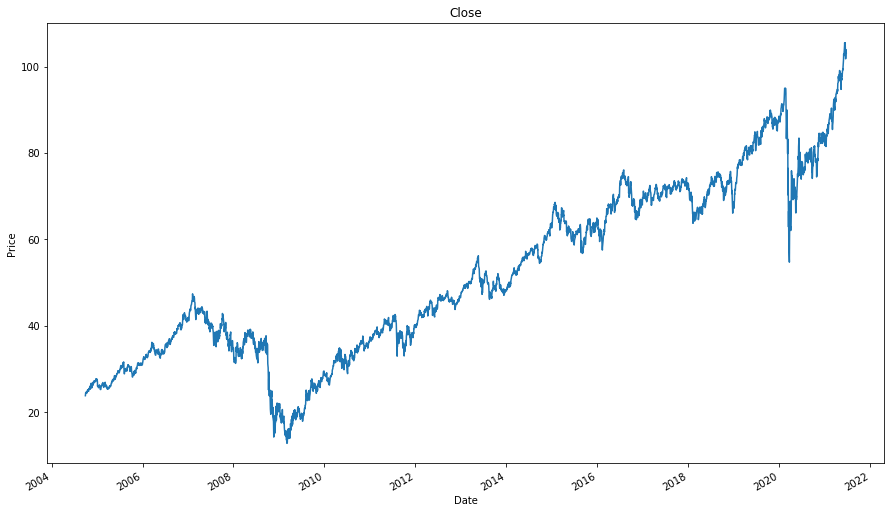

In [8]:
# Original time series
ut.visualize_time_series(vnq['Close'])

## Stationary Check + Decomposition Plot

[additive or multiplicative?](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.decompose.html)

- number of trading days in a year: 253
- number of trading days in a month: 22

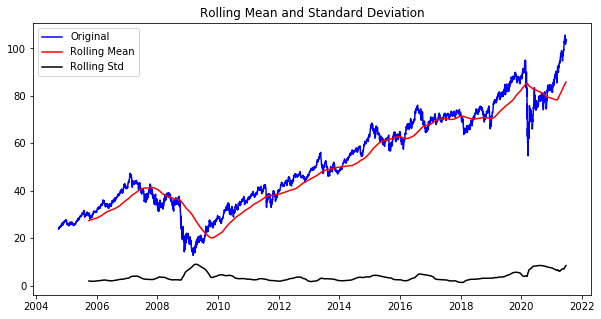

Non-stationary, because p ≥ 0.05 

Results of Dickey-Fuller test: 

Test Statistic                    0.206874
p-value                           0.972645
#Lags Used                       29.000000
Number of Observations Used    4183.000000
Critical Value (1%)              -3.431914
Critical Value (5%)              -2.862231
Critical Value (10%)             -2.567138
dtype: float64


In [9]:
ut.stationary_check_statsmodels(vnq['Close'], 253)

In [11]:
ut.stationary_check_pmdarima(vnq['Close'])

P-Value: 0.3360275927619044, so should you difference the data? True


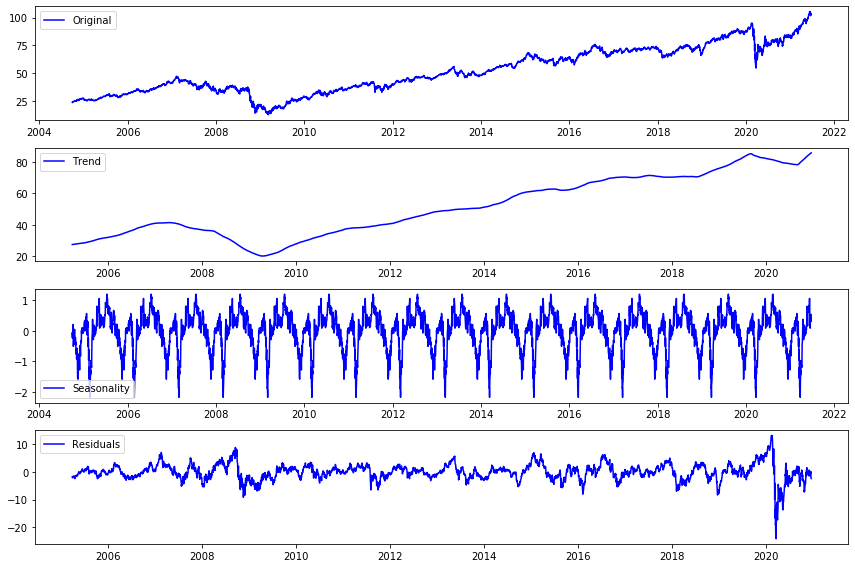

In [12]:
ut.decomposition_plot_statsmodels(vnq['Close'], 253)

- Seasonality is very small

## Detrend (differencing)
- estimate ARIMA [differencing term](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.ndiffs.html)

In [13]:
adf_diffs = ndiffs(vnq['Close'], alpha=0.05,  test='adf', max_d=10)

print(f"Estimated differencing term: {adf_diffs}")

Estimated differencing term: 1


In [15]:
diff_ts = ut.detrend_differencing(vnq['Close'], periods=1)

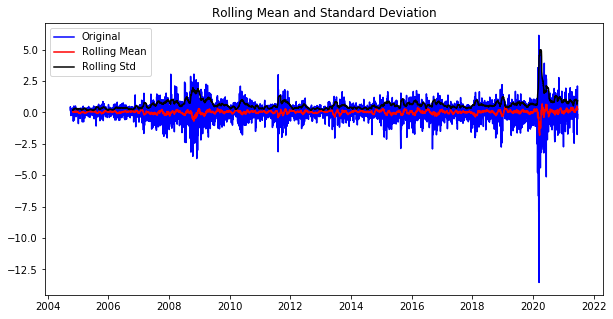

Stationary, because p < 0.05 

Results of Dickey-Fuller test: 

Test Statistic                -1.349919e+01
p-value                        3.000131e-25
#Lags Used                     2.800000e+01
Number of Observations Used    4.183000e+03
Critical Value (1%)           -3.431914e+00
Critical Value (5%)           -2.862231e+00
Critical Value (10%)          -2.567138e+00
dtype: float64


In [16]:
ut.stationary_check_statsmodels(diff_ts, 22)

## ACF & PACF

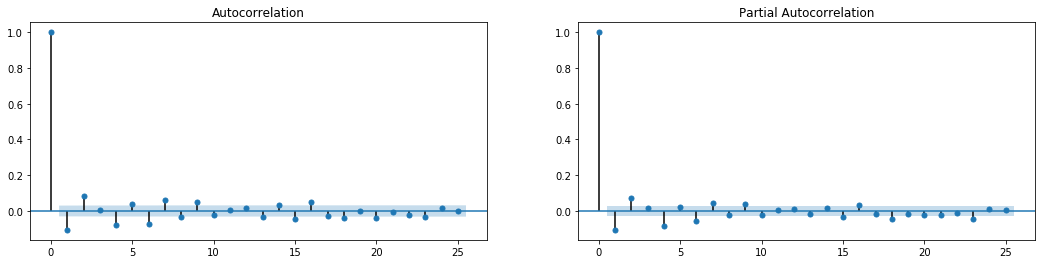

In [17]:
ut.plot_ACF_PACF(diff_ts)

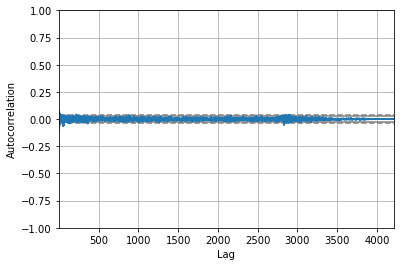

In [18]:
ut.pd_ACF(diff_ts)

## ARIMA Model

In [19]:
# Train Test Split
# Use pmdarima library
train, test = model_selection.train_test_split(vnq['Close'], test_size=253)

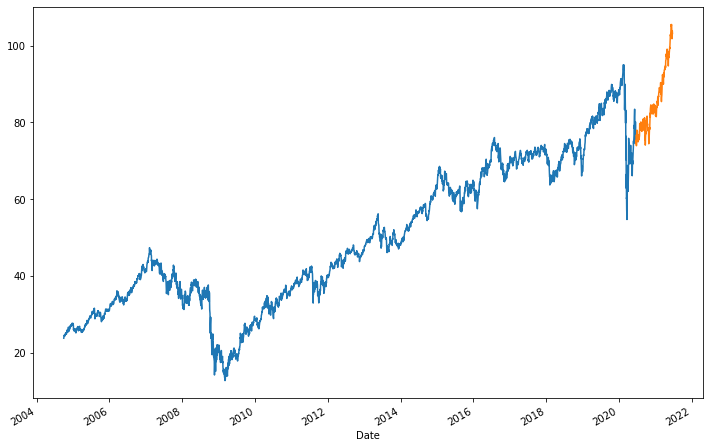

In [20]:
train.plot(figsize=(12,8))
test.plot(figsize=(12,8));

[pmdarima.auto_arima](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html)
- m = 4 quarterly
- m = 12 monthly
- m = 1 annually

In [21]:
# Use pmdarima to find the optimal p, d, q
arima_pmd = pm.auto_arima(train,
                          d=1,
                          max_p=2,
                          max_q=2,
                          error_action='ignore', 
                          trace=True,
                          suppress_warnings=True, 
                          maxiter=100,
                          seasonal=True,
                          m=1)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9012.397, Time=4.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9100.322, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9048.308, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9056.214, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9099.545, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9020.609, Time=0.71 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9026.923, Time=0.85 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9038.573, Time=0.60 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=9011.747, Time=0.83 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=9019.866, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=9026.211, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=9038.059, Time=0.19 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0]          
Total fit time: 8.769 seconds


- [statsmodels arima](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)
- [forecast](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARMAResults.forecast.html)
- [example](https://dataplatform.cloud.ibm.com/exchange/public/entry/view/1835c567cd309d54fc797900f79a60f9)
- [SARIMAX](https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/)

In [22]:
# Change the train values into a list
history = [x for x in train] 

pred = [] # prediction
cf_left = [] # confidence interval: lower bound
cf_right = [] # confidence interval: upper bound


for t in range(len(test)):
    # Fit the model using statsmodels library
    arima = ARIMA(history, order=(2,1,2)).fit()
    
    # Make prediction
    forecast, stderr, conf_int = arima.forecast()
    
    # Predicted price
    prediction = forecast
    pred.append(prediction)
    
    # Confidence interval for predicted price
    cf_left.append(conf_int[0][0])
    cf_right.append(conf_int[0][1])
    
    # Actual price
    actual = test[t]
    history.append(actual)
    print('predicted=%f, expected=%f' % (prediction, actual))

predicted=77.312293, expected=76.604248


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=76.566598, expected=74.421883
predicted=74.676600, expected=75.372398
predicted=75.065348, expected=73.925735
predicted=74.172352, expected=75.352982
predicted=75.249968, expected=76.246223
predicted=76.015120, expected=78.003593
predicted=77.961946, expected=77.780281
predicted=77.949910, expected=77.741447


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=77.714150, expected=76.197685
predicted=76.336902, expected=76.090889
predicted=76.010229, expected=75.615128
predicted=75.661845, expected=75.848160
predicted=75.837644, expected=74.945206
predicted=75.066640, expected=75.576294
predicted=75.442718, expected=76.314186
predicted=76.288494, expected=75.401535
predicted=75.628061, expected=76.382156
predicted=76.177309, expected=75.469498
predicted=75.630630, expected=75.653969
predicted=75.634540, expected=76.809364
predicted=76.653424, expected=76.488953
predicted=76.672854, expected=75.925827
predicted=75.991386, expected=76.644310
predicted=76.460509, expected=78.168648
predicted=78.099514, expected=79.683281
predicted=79.710481, expected=79.168701
predicted=79.329728, expected=79.023056
predicted=79.007626, expected=77.974464
predicted=78.068814, expected=79.139565
predicted=79.013313, expected=78.741486
predicted=78.804193, expected=78.867706
predicted=78.937238, expected=79.993973
predicted=79.761491, expected=80.120193


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=75.092147, expected=76.729500
predicted=76.626882, expected=78.206955
predicted=78.142079, expected=78.343933
predicted=78.515496, expected=78.715744
predicted=78.656222, expected=78.177597
predicted=78.230399, expected=80.946594
predicted=80.549387, expected=82.130508
predicted=82.182479, expected=82.443611
predicted=82.515755, expected=81.367325
predicted=81.344041, expected=83.539459
predicted=83.476439, expected=84.478767
predicted=84.302251, expected=84.557045
predicted=84.805353, expected=82.913261
predicted=82.861296, expected=83.236153
predicted=83.347816, expected=82.786072
predicted=82.710572, expected=82.942619
predicted=83.066095, expected=83.382919
predicted=83.233758, expected=83.431839
predicted=83.570848, expected=83.060036
predicted=83.030755, expected=82.189217
predicted=82.317832, expected=83.245934
predicted=83.110043, expected=82.590385
predicted=82.707862, expected=83.285072
predicted=83.250524, expected=84.557045
predicted=84.375657, expected=83.823219


In [23]:
ut.evaluate(test, pred)

MSE: 0.924 
MAE: 0.764
MAPE:0.009 


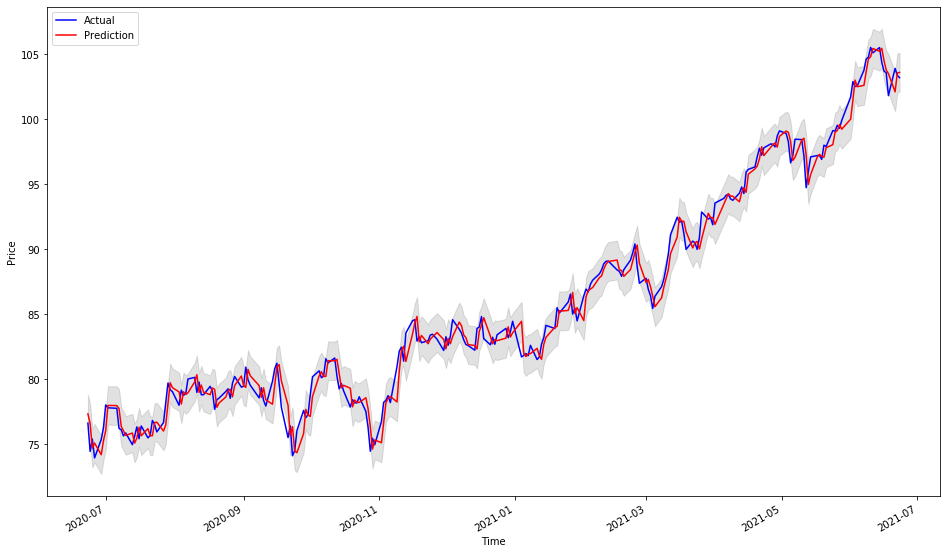

In [24]:
# Plot the prediction
ax = vnq.Close[test.index[0]:test.index[-1]].plot(figsize=(16,10), color='blue')

# Create a df for the predictions using same index as test part
df = pd.DataFrame(pred).set_index(test.index)
df.plot(ax=ax, color= 'red')

# Add the confidence interval for prediction
ax.fill_between(test.index, cf_left, cf_right, color='dimgray', alpha=0.2)

# Add the labels to the plot.
plt.legend(('Actual', 'Prediction'), loc=2)
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

https://machinelearningmastery.com/save-arima-time-series-forecasting-model-python/

In [28]:
arima.save('./models/arima_statsmodels.pkl')